# Poisson Distribution
***
## Definition
>The Poisson distribution [...] [is a discrete probability distribution] that expresses the probability of a given number of events occurring in a fixed interval of time or space if these events occur with a known constant rate and independently of the time since the last event.$ ^{[1]}$.

## Formula
The probability mass function of a Poisson distributed random variable is defined as:
$$ f(x|\lambda) = \frac{\lambda^{x}e^{-\lambda}}{x!}$$
where $\lambda$ denotes the mean of the distribution.

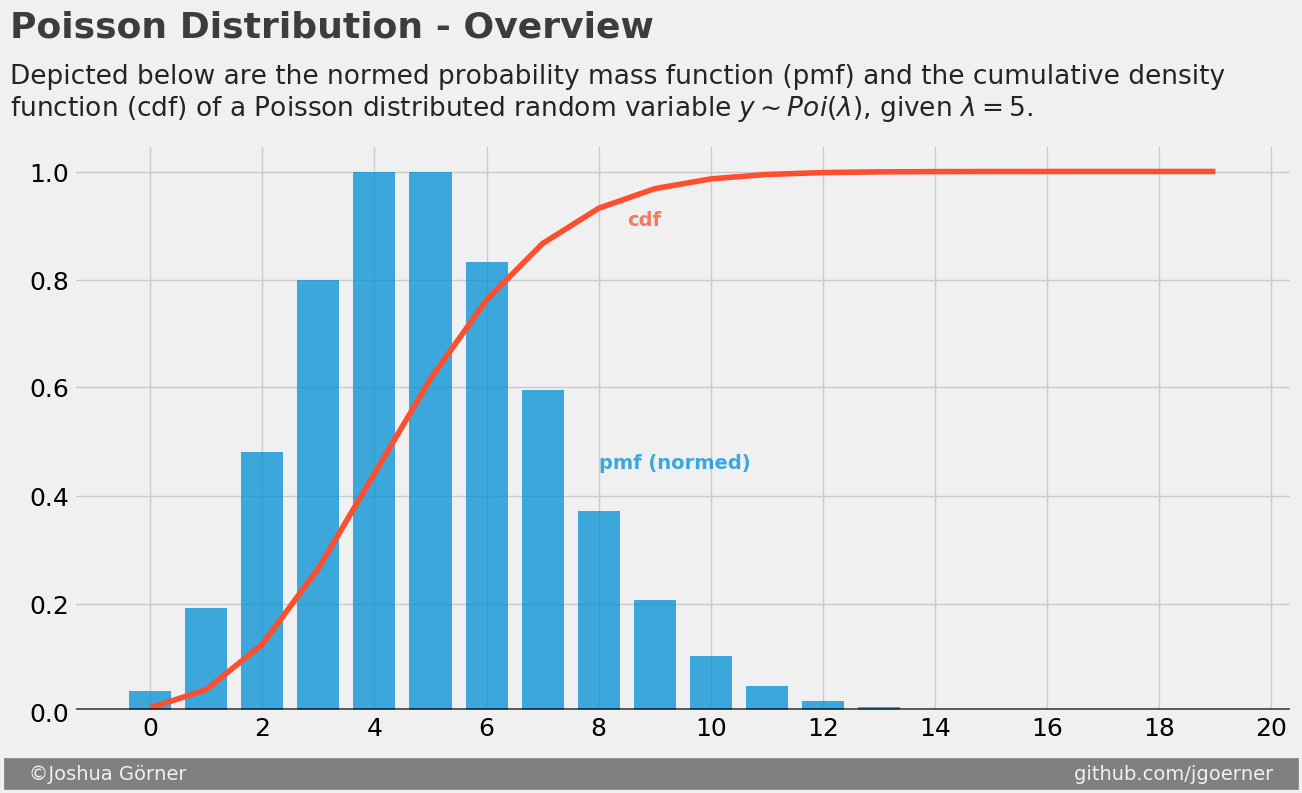

In [2]:
# %load ./src/poisson/01_general.py

***
## Parameters

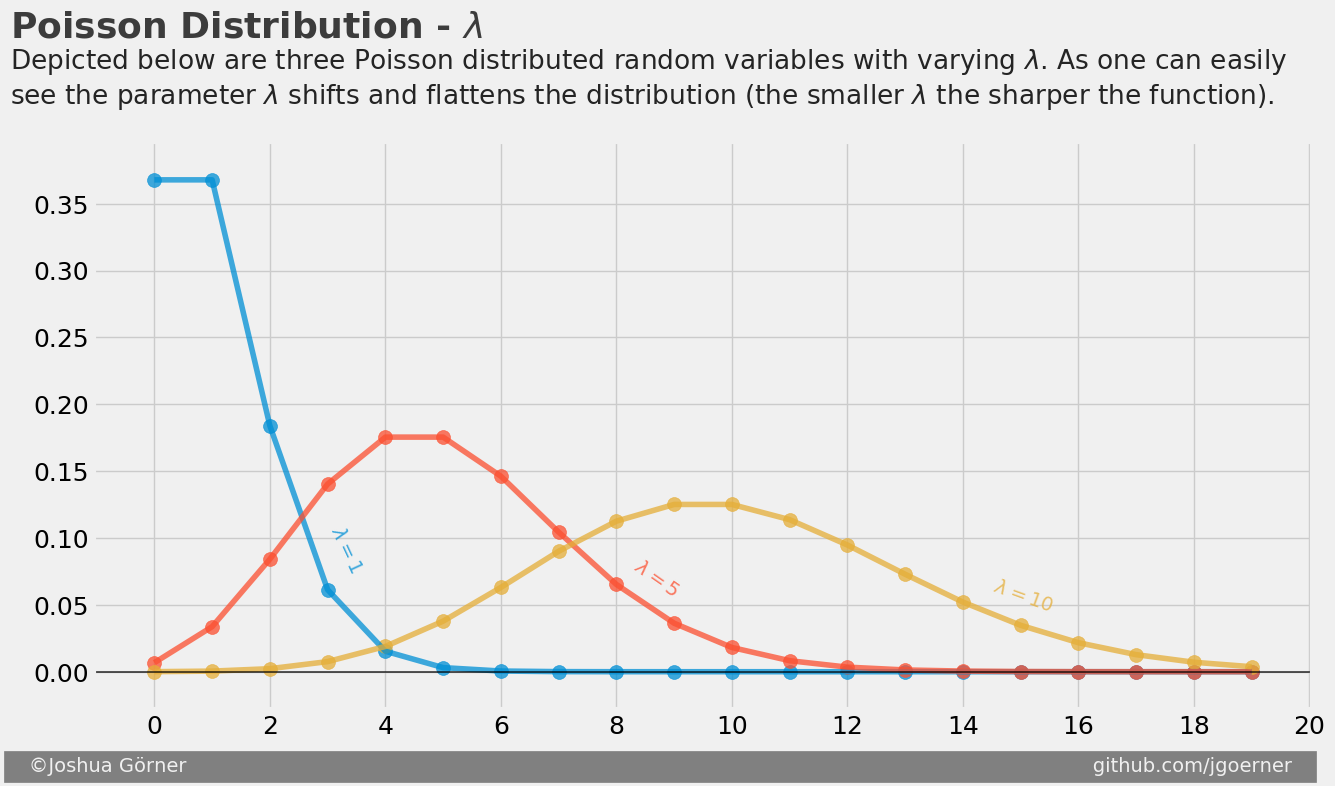

In [4]:
# %load ./src/poisson/02_lambda.py

*** 
## Implementation in Python
Multiple Python packages implement the Poisson distribution. One of those is the `stats.poisson` module from the `scipy` package. The following methods are only an excerpt. For a full list of features the [official documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html) should be read.

### Random Variates
In order to generate a random sample from, the function `rvs` should be used. 

In [5]:
import numpy as np
from scipy.stats import poisson

# draw a single sample
np.random.seed(42)
print(poisson.rvs(mu=10), end="\n\n")

# draw 10 samples
print(poisson.rvs(mu=10, size=10), end="\n\n")

12

[ 6 11 14  7  8  9 11  8 10  7]



### Probability Mass Function
The probability mass function can be accessed via the `pmf` function (mass instead of density since the Poisson distribution is discrete). Like the `rvs` method, the `pdf` allows for adjusting the mean of the random variable:

pdf(X=1) = 0.03368973499542734
pdf(X=7) = 0.10444486295705395


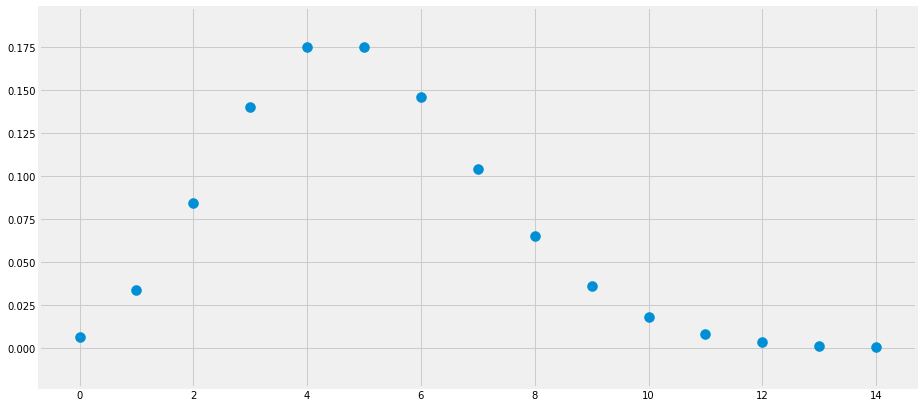

In [6]:
from scipy.stats import poisson

# additional imports for plotting purpose
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (14,7)

# likelihood of x and y
x = 1
y = 7
print("pdf(X=1) = {}\npdf(X=7) = {}".format(poisson.pmf(k=x, mu=5), poisson.pmf(k=y, mu=5)))

# continuous pdf for the plot
x_s = np.arange(15)
y_s = poisson.pmf(k=x_s, mu=5)
plt.scatter(x_s, y_s, s=100);

### Cumulative Probability Density Function
The cumulative probability density function is useful when a "real" probability has to be calculated. It can be accessed via the `cdf` function:

In [7]:
from scipy.stats import poisson

# probability of x less or equal 0.3
print("P(X <=3) = {}".format(poisson.cdf(k=3, mu=5)))

# probability of x in [-0.2, +0.2]
print("P(2 < X <= 8) = {}".format(poisson.cdf(k=8, mu=5) - poisson.cdf(k=2, mu=5)))

P(X <=3) = 0.2650259152973616
P(2 < X <= 8) = 0.8072543457950705


***
## Infering $\lambda$
Given a sample of datapoints it is often required to estimate the "true" parameters of the distribution. In the case of the Poisson distribution this estimation is quite simple. $\lambda$ can be derived by calculating the mean of the sample.

Estimated LAMBDA: 6.923


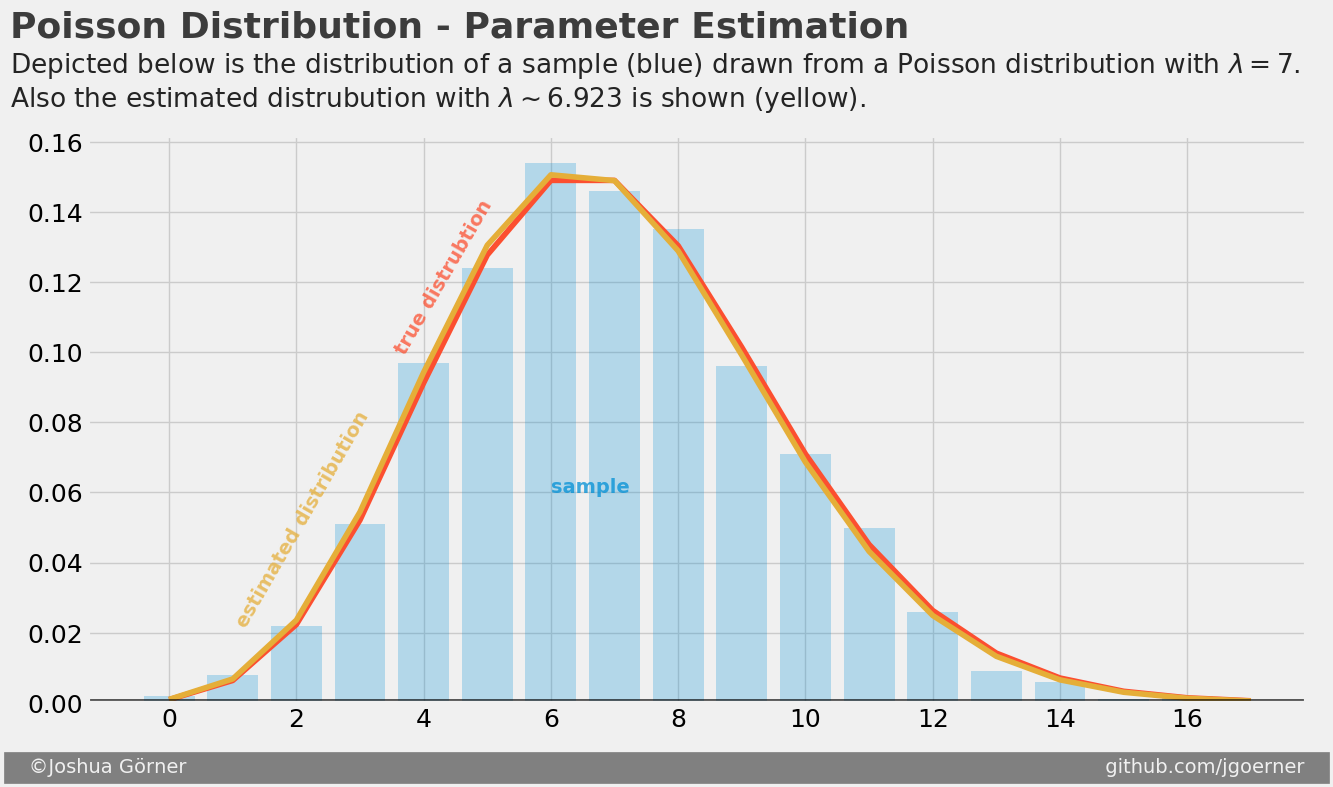

In [9]:
# %load ./src/poisson/03_estimation.py

## Infering $\lambda$ - MCMC
In addition to a "direct" inference, $\lambda$ can also be estimated using Markov chain Monte Carlo simulation - implemented in Python's [PyMC3](https://github.com/pymc-devs/pymc3).

WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'
100%|██████████| 50500/50500 [00:11<00:00, 4542.85it/s]


95% of sampled lambdas are between 6.764 and 7.086


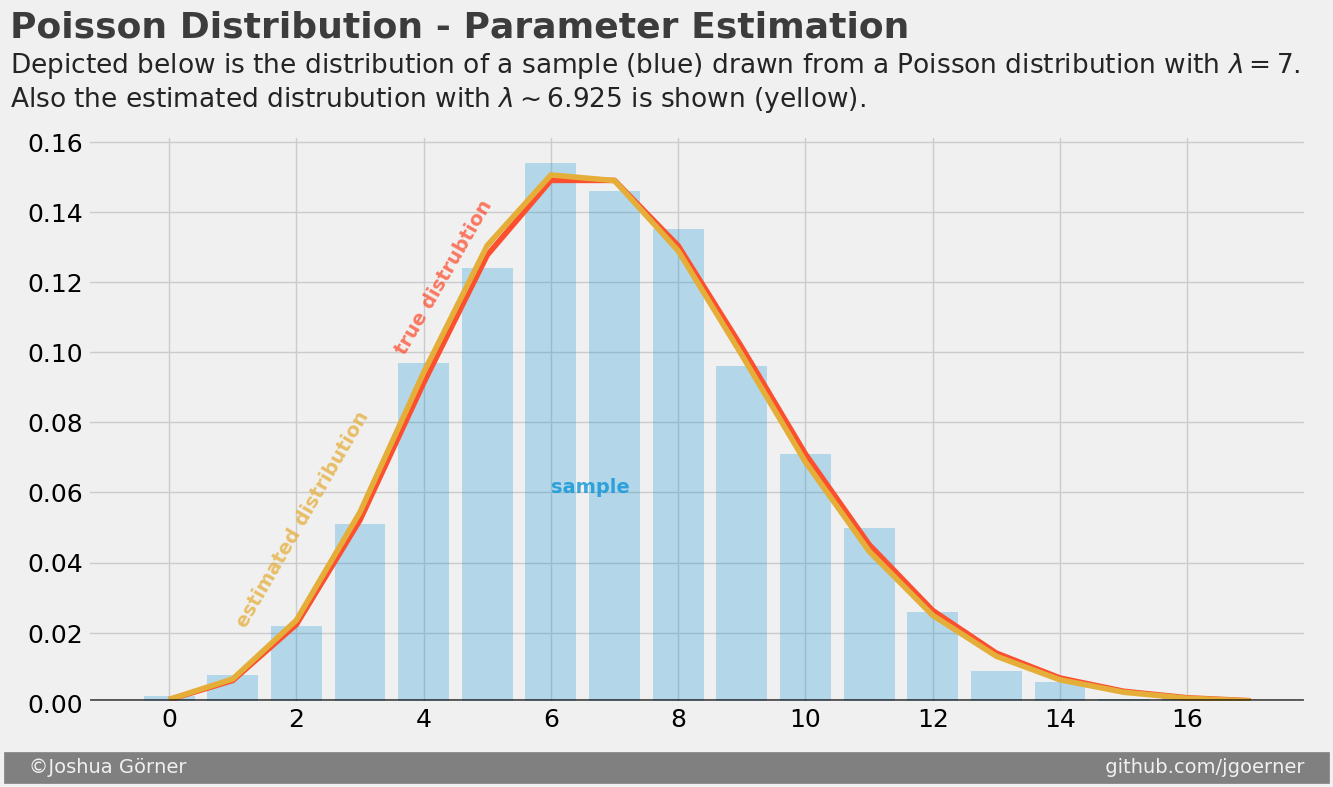

In [11]:
# %load ./src/poisson/04_mcmc_estimation.py

***
[1] - [Wikipedia. Poisson Distribution](https://en.wikipedia.org/wiki/Poisson_distribution)